<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%209/Tutorial9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering

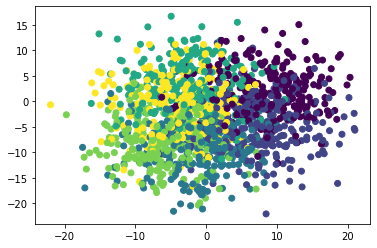

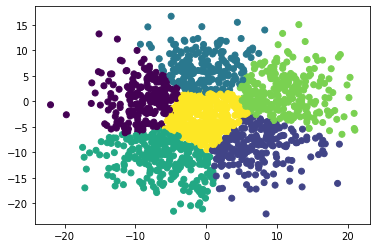

Centres of clusters
 [[ -8.90388372   0.43542718]
 [  7.02290631  -8.89208973]
 [ -0.48204435   6.6587898 ]
 [ -6.06457897 -11.31337374]
 [ 10.98507929   1.61453348]
 [ -0.44393261  -3.12598961]]
Sum of squared d from samples to their closest cluster centre
 34833.86388713595


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1500, centers=6, cluster_std=5)
km = KMeans(n_clusters=6)
y_km = km.fit_predict(X)

# Plot real clusters vs predicted clusters
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y_km)
plt.show()
print("Centres of clusters:\n", km.cluster_centers_)
print("Sum of squared d from samples to their closest cluster centre:\n", km.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


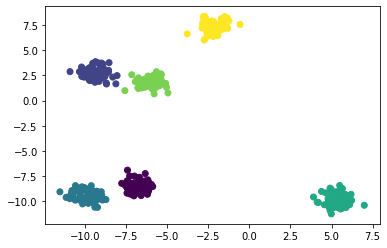

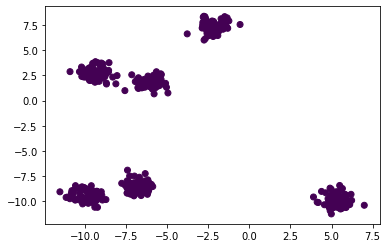

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

X, y = make_blobs(n_samples=500, centers=6, cluster_std=0.5)
km = AffinityPropagation()
y_km = km.fit_predict(X)

# Plot real clusters vs predicted clusters
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y_km)
plt.show()
#print("Centres of clusters:\n", km.cluster_centers_)
#print("Sum of squared d from samples to their closest cluster centre:\n", km.inertia_)

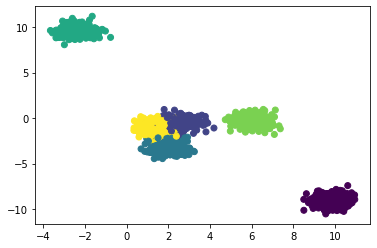

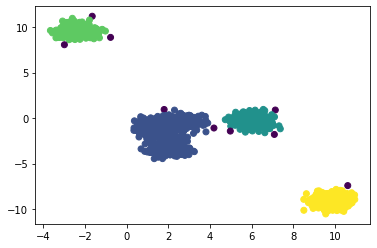

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=1500, centers=6, cluster_std=0.5)
km = DBSCAN()
y_km = km.fit_predict(X)

# Plot real clusters vs predicted clusters
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y_km)
plt.show()
#print("Centres of clusters:\n", km.cluster_centers_)
#print("Sum of squared d from samples to their closest cluster centre:\n", km.inertia_)

## Principal Component Analysis

[[ 0.93945406  0.34267486]
 [-0.34267486  0.93945406]]
1st Principal Component angle: 20.039925109672044 degrees


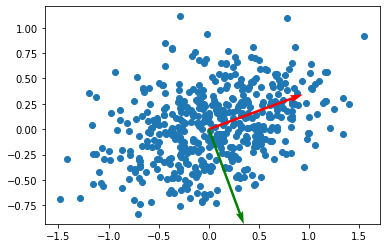

In [71]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar

X = np.random.multivariate_normal([0,0], get_cov(sdx=0.3, sdy=0.1, rotangdeg=23), size = 500)

fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
plt.quiver([0,0], [0,0], pca.components_[:,0], pca.components_[:,1],color=['r','g'], scale_units='xy', scale=1.0)
# red is 1st PC, green is 2nd PC
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.components_)
print("1st Principal Component angle:", np.arctan(pca.components_[0,1]/pca.components_[0,0])*180/np.pi, "degrees")

## SUBMISSION

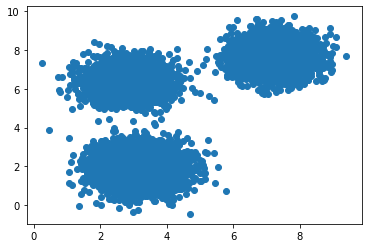

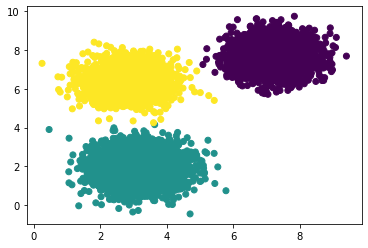

Cluster centres:
 [[7.19831173 7.70619219]
 [3.19462558 1.91429061]
 [2.88507126 6.39672699]]


In [3]:
# SUBMISSION A
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans

df = pandas.read_csv("volts.csv")
y1 = np.array(df['y1'])
y2 = np.array(df['y2'])
y = np.concatenate((y1.reshape(len(y1), 1), y2.reshape(len(y2), 1)), axis=1)

fig,ax = plt.subplots()
ax.scatter(y[:,0],y[:,1])
plt.show()

km = KMeans(n_clusters=3)
y_km = km.fit_predict(y)

fig,ax = plt.subplots()
ax.scatter(y[:,0],y[:,1], c=y_km)
plt.show()

print("Cluster centres:\n", km.cluster_centers_)

Three voltage classes (to 2dp):

[7.12 7.71], [3.19 1.91], [2.89 6.40]

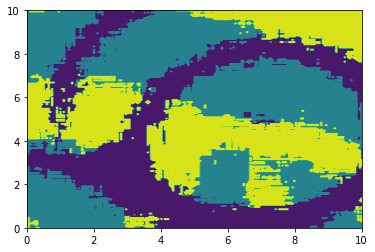

<Figure size 432x288 with 0 Axes>

In [18]:
# SUBMISSION B
from sklearn import ensemble

npx=200
npy=200
x1line = np.linspace(0, 10, npx)
x2line = np.linspace(0, 10, npy)
x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T


x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
X = np.concatenate((x1.reshape(len(x1), 1), x2.reshape(len(x2), 1)), axis=1)

rf = ensemble.RandomForestClassifier(n_estimators=100,max_depth=20)
rf.fit(X,y_km)

rf_pred = rf.predict(Xgrid)
rf_plot = rf_pred.reshape(npx,npy)

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,rf_plot)
plt.show()
plt.savefig('RandomForestB.png')

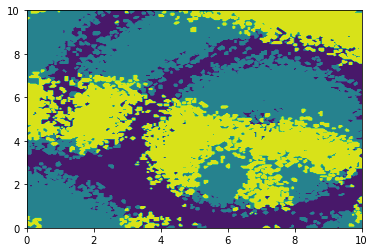

<Figure size 432x288 with 0 Axes>

In [19]:
# SUBMISSION C
from sklearn.neighbors import KNeighborsClassifier

near = 1
neigh = KNeighborsClassifier(n_neighbors=near) 
neigh.fit(X, y_km)
kneigh = neigh.predict(Xgrid)
kneigh_plot = kneigh.reshape(npx,npy)

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,kneigh_plot)
plt.show()
plt.savefig('1NearestNeighbourC.png')

## SUBMISSION D
1. Random decisions trees because it produces more distinct and clear decision boundaries and shows high variance when compared to 1-Nearest-neighbours which shows high bias. 

2. For continuous outputs, linear regression could be used instead (and neural networks if very non-linear). Regression could not be used for classification as it models the continuous relationship between input and output rather than distinguishing between output classes with decision boundaries.